In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [19]:
def find_circles(fname, blur=5, dp=1, minDist=30, edge=240, accumulator=20, minR=20, maxR=50):
    img = cv2.imread(fname)
    # Blur image for smoothing
    blur = cv2.medianBlur(img, blur)
    # Maybe additional smoothing?
    # Hough Circles Function
    circles = cv2.HoughCircles(image=cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY),
                               method=cv2.HOUGH_GRADIENT,
                               dp=dp, minDist=minDist, param1=edge, param2=accumulator,
                               minRadius=minR, maxRadius=maxR)
    print("Found {0} circles".format(circles.shape[1]))
    # Show circles found
    circles = np.uint16(np.around(circles))
    if circles is not None:
        output = img.copy()
        for i in circles[0, :]:
            # draw the outer circle
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # draw the center of the circle
            cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)
        # Show image
        plt.imshow(output)
        # Save
        cv2.imwrite('counted_'+fname, output)

Found 5 circles


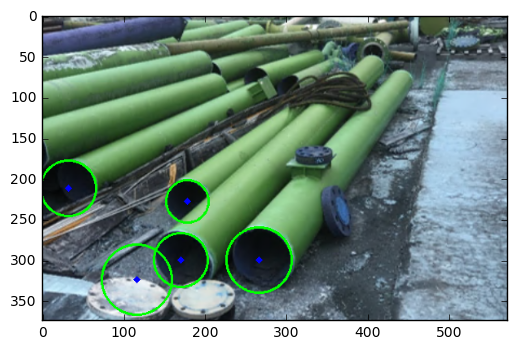

In [28]:
find_circles("pipe_test2.PNG")

Found 103 circles


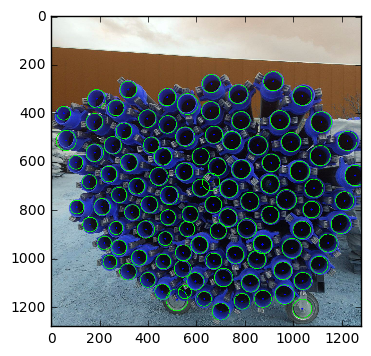

In [21]:
find_circles("pipe_test.jpg")

Found 24 circles


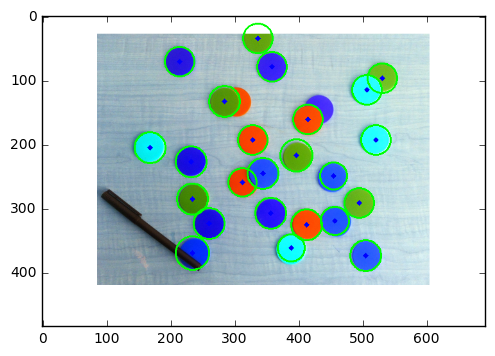

In [24]:
find_circles("circles.png")

Found 30 circles


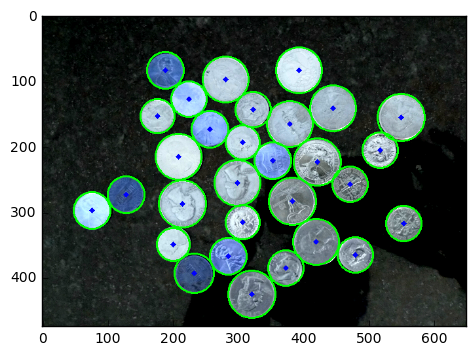

In [26]:
find_circles("testy.png")